In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [64]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [65]:
iris_data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
# 독립변수
df = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
# 종속변수, 레이블
y = pd.DataFrame(iris_data["target"], columns=["target"])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [35]:
# X 대문자 -> 행렬, y 소문자 -> 상수 의미
# dataframe화 할 수 있는지 행 개수 확인
X = df
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [36]:
iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [69]:
y = y.replace({'target' : {0:'setosa', 1:'versicolor', 2:'virginica'}})
# target = []
# for i in y['target']:
#     if(i == 0):
#         target.append('setosa')
#     elif(i == 1):
#         target.append('versicolor')
#     elif(i == 2):
#         target.append('virginica')
#     else:
#         pass
# y["target"] = target
y

,target
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [ ]:
for a, i in enumerate(iris_data["target_names"]):
    y["target"] = y["target"].replace(a,i)
    # a는 index, i는 값
y

In [43]:
y = pd.DataFrame([y["target"].replace(a,i) for a,i in enumerate(iris_data["target_names"])])
y

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
target,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,2,2,2,2,2,2,2,2,2,2
target,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
target,0,0,0,0,0,0,0,0,0,0,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


In [61]:
y["target"] = y["target"].apply(lambda x : str(x).replace(str(x), iris_data["target_names"][x]))
# int형은 replace할 수 없기 때문에 str으로 형변환 시켜줌
y

In [54]:
df = pd.DataFrame(iris_data["data"], columns=["si","sw","pi","pw"])
df.head()

,si,sw,pi,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
# data 개수가 많아지면 시간이 오래걸림
imsi=[]
for i in df["si"]:
    imsi.append(int(i))
df["si"]=imsi
df.head()

,si,sw,pi,pw
0,5,3.5,1.4,0.2
1,4,3.0,1.4,0.2
2,4,3.2,1.3,0.2
3,4,3.1,1.5,0.2
4,5,3.6,1.4,0.2


In [52]:
df["si"] = df["si"].apply(lambda x : int(x))
df

,si,sw,pi,pw
0,5,3.5,1.4,0.2
1,4,3.0,1.4,0.2
2,4,3.2,1.3,0.2
3,4,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6,3.0,5.2,2.3
146,6,2.5,5.0,1.9
147,6,3.0,5.2,2.0
148,6,3.4,5.4,2.3


In [55]:
df["sw"] = df["sw"].apply(lambda x: x**2)
df

,si,sw,pi,pw
0,5.1,12.25,1.4,0.2
1,4.9,9.00,1.4,0.2
2,4.7,10.24,1.3,0.2
3,4.6,9.61,1.5,0.2
4,5.0,12.96,1.4,0.2
...,...,...,...,...
145,6.7,9.00,5.2,2.3
146,6.3,6.25,5.0,1.9
147,6.5,9.00,5.2,2.0
148,6.2,11.56,5.4,2.3


In [70]:
X = df
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [72]:
df = pd.concat([X,y], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [73]:
df.corrwith(df["target"])

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
dtype: float64

In [78]:
# target이 명목척도인데 0,1,2로 되어 있어서 서열척도, 등간척도로 볼 수 있음
# one-hot encoding 해줘야 함
setosa = []
versicolor = []
virginica = []
for i in df["target"]:
    if i==0:
        setosa.append(1)
        versicolor.append(0)
        virginica.append(0)
    elif i==1:
        setosa.append(0)
        versicolor.append(1)
        virginica.append(0)
    else :
        setosa.append(0)
        versicolor.append(0)
        virginica.append(1)

df["is setosa"] = setosa
df["is versicolor"] = versicolor
df["is virginica"] = virginica

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,is setosa,is versicolor,is virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,1
146,6.3,2.5,5.0,1.9,2,0,0,1
147,6.5,3.0,5.2,2.0,2,0,0,1
148,6.2,3.4,5.4,2.3,2,0,0,1


In [82]:
# + : 양의 상관관계
# - : 음의 상관관계
# |수치| : 관계성향이 강함
df.corrwith(df["is setosa"])

sepal length (cm)   -0.717416
sepal width (cm)     0.603348
petal length (cm)   -0.922765
petal width (cm)    -0.887344
target              -0.866025
is setosa            1.000000
is versicolor       -0.500000
is virginica        -0.500000
dtype: float64

In [81]:
df.corrwith(df["is versicolor"])

sepal length (cm)    7.939552e-02
sepal width (cm)    -4.677031e-01
petal length (cm)    2.017545e-01
petal width (cm)     1.178988e-01
target               5.768888e-18
is setosa           -5.000000e-01
is versicolor        1.000000e+00
is virginica        -5.000000e-01
dtype: float64

In [80]:
df.corrwith(df["is virginica"])

sepal length (cm)    0.638020
sepal width (cm)    -0.135645
petal length (cm)    0.721011
petal width (cm)     0.769445
target               0.866025
is setosa           -0.500000
is versicolor       -0.500000
is virginica         1.000000
dtype: float64

In [83]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112, 1)
(38, 1)


In [95]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


### EDA

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

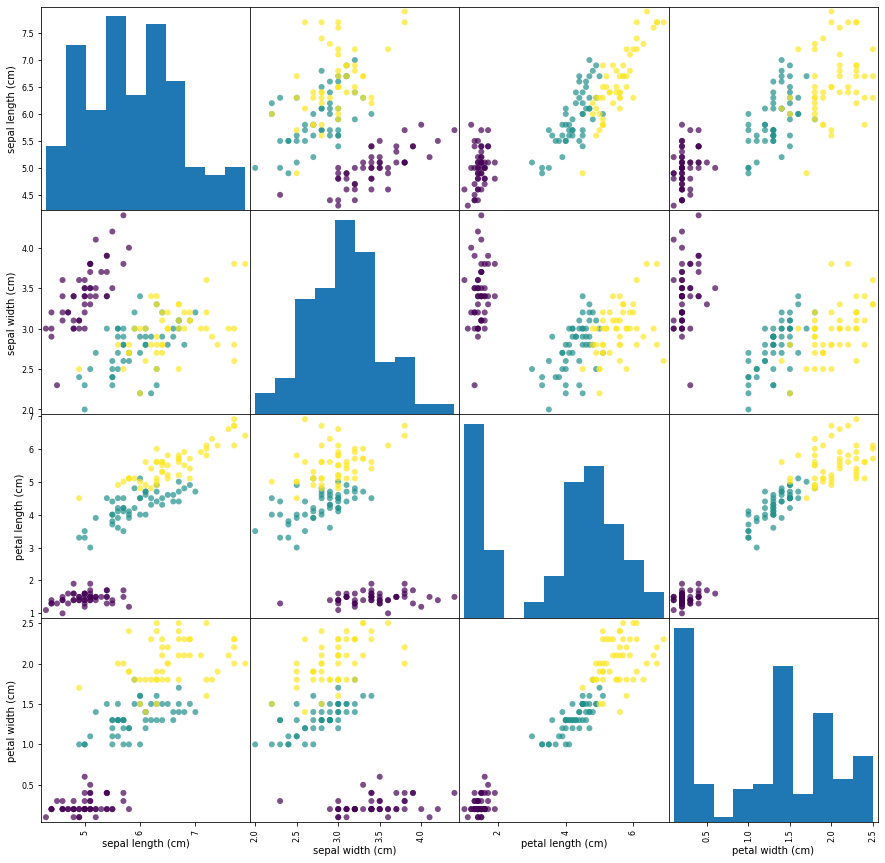

In [110]:
# 독립변수 간 상관도
pd.plotting.scatter_matrix(X,figsize=(15,15), marker='o', c=np.array(y), alpha=0.7)

In [125]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
prediction

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [118]:
metrics.accuracy_score(prediction, y_test)

0.9736842105263158

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

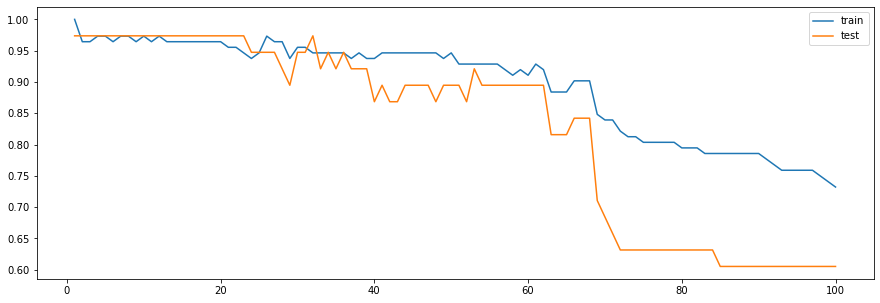

In [124]:
from tqdm import tqdm
train_list=[]
test_list=[]

for i in tqdm(range(1,101)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    train_list.append(model.score(X_train, y_train))
    test_list.append(model.score(X_test, y_test))
    
plt.figure(figsize=(15,5))
plt.plot(range(1,101), train_list, label="train")
plt.plot(range(1,101), test_list, label="test")
plt.legend(loc="upper right")
plt.show()